# Section 1 - Investigate the wine data set and perform dimensionality reduction. (AA3.2, 7 marks)

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0                        

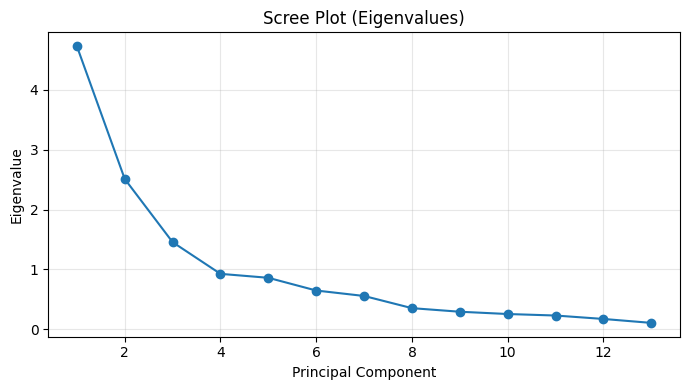

d) Chosen number of dimensions: k = 10 (>= 95% variance)
Saved PCA-transformed data to: wine_pca.csv (columns: ['PC1', 'PC2', 'PC3'] + target)
First 10 rows of PCA-transformed data (PC1..PC3):
        PC1       PC2       PC3  class
0  3.316751  1.443463 -0.165739      1
1  2.209465 -0.333393 -2.026457      1
2  2.516740  1.031151  0.982819      1
3  3.757066  2.756372 -0.176192      1
4  1.008908  0.869831  2.026688      1
5  3.050254  2.122401 -0.629396      1
6  2.449090  1.174850 -0.977095      1
7  2.059437  1.608963  0.146282      1
8  2.510874  0.918071 -1.770969      1
9  2.753628  0.789438 -0.984247      1


In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# a) Perform PCA on all attributes (excluding the variety/target)
# fetch dataset
wine = fetch_ucirepo(id=109)

# features and target
X = wine.data.features
print(X.head())
# Targets are kept aside and not used in PCA
try:
    y = wine.data.targets
    target_col_name = y.columns[0]
except Exception:
    y = None
    target_col_name = "target"

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA with all components
pca_full = PCA(n_components=13)
X_pca_full = pca_full.fit_transform(X_scaled)

# a) Results summary
explained_var_ratio = pca_full.explained_variance_ratio_
cum_evr = np.cumsum(explained_var_ratio)
print("PCA Results")
print(np.round(explained_var_ratio, 6).tolist())
print("Cumulative explained variance ratio:")
print(np.round(cum_evr, 6).tolist())

# b) Eigenvalues (descending)
eigenvalues = pca_full.explained_variance_
# sklearn returns components ordered by descending explained variance
print("Eigenvalues :")
print(np.round(eigenvalues, 6).tolist())

# c) Scree plot (Eigenvalues)
plt.figure(figsize=(7,4))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title('Scree Plot (Eigenvalues)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# d) Choose number of dimensions to keep using >=95% cumulative explained variance
threshold = 0.95
k = int(np.argmax(cum_evr >= threshold)) + 1
print(f"d) Chosen number of dimensions: k = {k} (>= {threshold*100:.0f}% variance)")

# Save only the first 3 principal components
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

pc_cols = ["PC1", "PC2", "PC3"]
df_pca = pd.DataFrame(X_pca_3, columns=pc_cols)
if y is not None:
    df_pca[target_col_name] = y[target_col_name]

# Save updated data (only PC1..PC3)
output_path = 'wine_pca.csv'
df_pca.to_csv(output_path, index=False)
print(f"Saved PCA-transformed data to: {output_path} (columns: {pc_cols} + target)")

# Show first 10 rows for documentation/screenshot
print("First 10 rows of PCA-transformed data (PC1..PC3):")
print(df_pca.head(10))

## PCA Results Summary

**a) PCA on features:**
- Explained variance ratio per component:
  - [0.361988, 0.192075, 0.111236, 0.07069, 0.065633, 0.049358, 0.042387, 0.026807, 0.022222, 0.0193, 0.017368, 0.012982, 0.007952]
- Cumulative explained variance:
  - [0.361988, 0.554063, 0.6653, 0.73599, 0.801623, 0.850981, 0.893368, 0.920175, 0.942397, 0.961697, 0.979066, 0.992048, 1.0]

**b) Eigenvalues :**
- [4.732437, 2.511081, 1.454242, 0.924166, 0.858049, 0.645282, 0.554141, 0.350466, 0.290512, 0.25232, 0.227064, 0.169724, 0.103962]

**d) Dimension choice vs saved output:**
- Chosen `k = 13`, components meet ≥95% cumulative explained variance (0.9617).
- the saved dataset includes only `PC1`, `PC2`, `PC3` plus the original target column.


In [2]:
import pandas as pd

# Display first 10 rows of the saved PCA data for screenshot
df = pd.read_csv('wine_pca.csv')
df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,class
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,1
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,1
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,1
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,1
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,1
5,3.050254,2.122401,-0.629396,-0.515637,-0.632019,-0.123431,0.401654,-0.394893,0.152146,-0.101996,1
6,2.449090,1.174850,-0.977095,-0.065831,-1.027762,0.620121,0.052891,0.371934,0.457016,1.016563,1
7,2.059437,1.608963,0.146282,-1.192608,0.076903,1.439806,0.032376,-0.232979,-0.123370,0.735600,1
8,2.510874,0.918071,-1.770969,0.056270,-0.892257,0.129181,0.125285,0.499578,-0.606589,0.174107,1
9,2.753628,0.789438,-0.984247,0.349382,-0.468553,-0.163392,-0.874352,-0.150580,-0.230489,0.179420,1


# Section 2 - Find and analyse clusters in the data set. (KU1.2, 5 marks) (SE4.3, 10 marks) (KU3.1, 5 marks)

### Task 1 - Clustering Analysis

**K-Means Clustering**

- `K-Means` partitions data into clusters by minimizing the distance between points and there cluster center
- The algorithm randomly assignes points to clusters or selects random cluster centers , different random seeds can lead to different results

- **Expected Results**
    - partitions wines into distinct, non-overlapping groups
- **Advantages**
    - Fast & Simple thus being very efficient for small datasets like this one
- **Disadvantages**
    - Results vary based on initialization

**Density-Based Clustering (DBSCAN)**

- `DBSCAN` groups points that are packed close together. Unlike K-means it does not require a pre-set number of clusters and can identify outliers in low-dense areas, which is useful when a dataset contains anomalies

- **Expected Results**
    - Groups based on density may leave some wines unclassified if they are outliers
- **Advantages**
    - Can find aribtrary shapes and outliers, no need to input k
- **Disadvantages**
    - Hard to tune density parameters for 13 attributes

**Hierarchical Clustering**

- `Hierarchical` builds a tree of clusters by merging simlar points or splitting them. it does not require a fixed number of clusters instead it **cuts** the tree at a specific level to define the wine groups

- **Expected Results**
    -  A Clustered Tree showing the wine varieties
- **Advantages**
    - Great for understanding relationships between varieties visually
- **Disadvangtages**
    - Slower than K-means, decisions to merge clusters cannot be undone